In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

In [ ]:
model = keras.models.load_model(r'/content/drive/MyDrive/Colab Notebooks/Face-mask /Classification/CNN.h5')
model

In [ ]:
#created a list by adding the value 1 to the beginning of the tuple using the unpacking operator.aba*
a = (50,50,3)
b = [1,*a]
b

[1, 50, 50, 3]

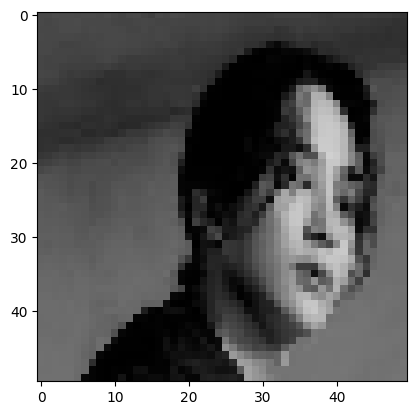

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Face-mask /Classification/without_mask_3.jpg'
master_I= cv2.imread(img_path)  #Read the image from the given path using the OpenCV library.
master_I = cv2.cvtColor(master_I,cv2.COLOR_BGR2RGB) #Converts the color space of the image from BGR (OpenCV's default color) to RGB (the color used by Matplotlib).
orig_image = cv2.cvtColor(master_I, cv2.COLOR_RGB2GRAY) #Converts RGB images to grayscale images.
image = cv2.resize(orig_image,(50,50)) #Resize grayscale image to 50x50 size.
image = image.reshape((*image.shape,1)) #Add a 3rd dimension to the grayscale image to form a 3D grayscale image.
image = tf.convert_to_tensor(image) #Convert images from NumPy array to Tensor for use in Tensorflow.
image = tf.image.grayscale_to_rgb(image).numpy()/255. #Convert images from Tensor to NumPy array and normalize pixel values between 0 and 1.
final_image = image.reshape(1, *image.shape) #Add batch_size dimension to the image so that it can be included in the model for prediction

plt.imshow(final_image[0],cmap='gray')

In [ ]:
#Returns the size of the first image in the batch
final_image[0].shape

(50, 50, 3)

In [ ]:
#make predictions on the data using the model loaded from the file
model.predict(final_image)

1/1 [==============================] - 0s 79ms/step


array([[0.76289815, 0.23710185]], dtype=float32)

In [ ]:
is_mask = tf.math.argmax(model.predict(final_image),1).numpy()[0]
is_mask

1/1 [==============================] - 0s 17ms/step


0

The meaningful snippet is to find whether the model predicted the image to be masked (1) or unmasked (0). The variable will store this result, and its value will be 0 or 1, depending on the model's prediction


-Returns 1 : yes, this picture have masked

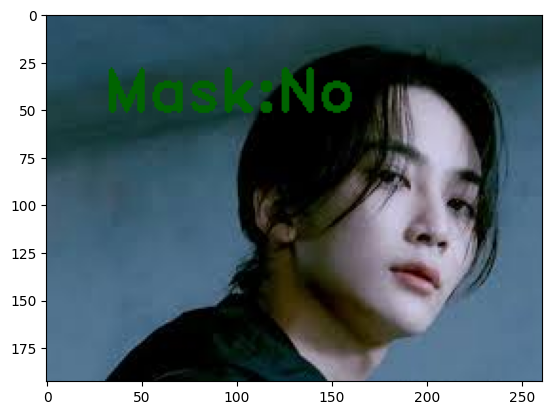

In [ ]:
def mask(img):
    if is_mask==1:
      img_with_text=cv2.putText(img,
                    'Mask:Yes', (30,50),
                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                    fontScale=1,
                    color=(0,100,0),thickness=2)
      plt.imshow(img_with_text)

    else:
        img_with_text=cv2.putText(img,
                    'Mask:No', (30,50),
                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                    fontScale=1,
                    color=(0,100,0),thickness=2)
        plt.imshow(img_with_text)

mask(master_I)